In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"


In [0]:
import os
import zipfile


In [0]:
path='/tmp/happy-or-sad.zip'
zip_ref=zipfile.ZipFile(path,'r')
zip_ref.extractall('/tmp/h-or-s')
zip_ref.close()


In [0]:
train_happy_dir=os.path.join('/tmp/h-or-s/happy')
train_sad_dir=os.path.join('/tmp/h-or-s/sad')


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows=4
ncols=4
train_happy_name=os.listdir(train_happy_dir)
train_sad_name=os.listdir(train_sad_dir)

fig=plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)

happy_path=[os.path.join(train_happy_dir,train_happy_name[i])
    for i in range(0,8)]
sad_path=[os.path.join(train_sad_dir,train_sad_name[i])
    for i in range(0,8)]
com=happy_path+sad_path
for i,toplot in enumerate(com):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image=mpimg.imread(toplot)
  plt.imshow(image)


In [0]:
import tensorflow as tf

In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255)
training_generator=train.flow_from_directory(
    '/tmp/h-or-s',
    batch_size=10,
    target_size=(150,150),
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,model,logs={}):
    if logs.get('acc')>0.999:
      print("\nReached 99.9 Accuracy")
      self.model.stop_training=True
stop=myCallback()
model.fit_generator(training_generator,steps_per_epoch=8,epochs=15,verbose=1,callbacks=[stop])

Epoch 1/15
8/8 [==============================] - 7s 876ms/step - loss: 2.1425 - acc: 0.6250
Epoch 2/15
8/8 [==============================] - 0s 33ms/step - loss: 0.4829 - acc: 0.7125
Epoch 3/15
8/8 [==============================] - 0s 23ms/step - loss: 0.2563 - acc: 0.8625
Epoch 4/15
8/8 [==============================] - 0s 24ms/step - loss: 0.1622 - acc: 0.9250
Epoch 5/15
8/8 [==============================] - 0s 26ms/step - loss: 0.2074 - acc: 0.9375
Epoch 6/15
8/8 [==============================] - 0s 25ms/step - loss: 0.0963 - acc: 0.9750
Epoch 7/15
8/8 [==============================] - 0s 23ms/step - loss: 0.3998 - acc: 0.8500
Epoch 8/15
8/8 [==============================] - 0s 25ms/step - loss: 0.0467 - acc: 0.9750
Epoch 9/15
6/8 [=====================>........] - ETA: 0s - loss: 0.0271 - acc: 1.0000
Reached 99.9 Accuracy
8/8 [==============================] - 0s 26ms/step - loss: 0.0254 - acc: 1.0000


Saving so-funny1.jpg to so-funny1.jpg
[1.]
so-funny1.jpg is Sad :(


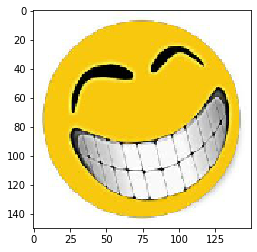

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn+" is Sad :(")
  else:
    print(fn +" is Happy :)")